# Ejemplo: Análisis exploratorio y visualización de textos
**Autor:** Unidad de Científicos de Datos (UCD)

---
Este ejemplo muestra las principales funcionalidades del módulo `exploracion`, de la librería **ConTexto**. Este módulo permite obtener distintas visualizaciones de un texto o conjunto de textos, tales como nubes de palabras, gráficos de barras con los términos más frecuentes, gráficos de dispersión léxica y redes de coocurrencias. Estas funciones son útiles para explorar uno o varios textos, y tener mejor idea de qué contienen sobre qué hablan.

Para mayor información sobre este módulos y sus funciones, se puede consultar <a href="https://ucd-dnp.github.io/ConTexto/versiones/master/funciones/exploracion.html" target="_blank">su documentación</a>.

---

## 1. Adecuar el texto de prueba

Para este ejemplo, se va a trabajar con la novela "Don Quijote de la Mancha", escrita por Miguel de Cervantes Saavedra. El texto completo de esta novela está en la carpeta de entradas, y fue descargado desde la página del <a href="https://www.gutenberg.org/" target="_blank">Proyecto Gutenberg</a>, que tiene a su disposición miles de libros de forma gratuita.


La función `leer_texto` del módulo `lectura` es utilizada para extraer el texto del archivo que contiene la novela. Luego, se realiza una limpieza estándar del texto, para que esté mejor adecuado para su exploración. Para esto, se utilizan las funciones `limpieza_texto` y `lista_stopwords`, del módulo limpieza.

Finalmente, en el texto aparece en varias ocasiones la expresión "project gutenberg", el nombre del proyecto que pone a disposición la novela. Como esta información no está directamente relacionada al texto que nos interesa, se va a remover utilizando la función `remover_stopwords`.

In [1]:
from contexto.lectura import leer_texto
from contexto.limpieza import limpieza_texto, lista_stopwords, remover_stopwords

# Cargar y limpiar texto de prueba
ruta_cuento = 'entrada/cervantes_don_quijote.txt'

texto_prueba = leer_texto(ruta_cuento)
texto = limpieza_texto(texto_prueba, quitar_numeros=False, n_min=3, lista_palabras=lista_stopwords())
texto = remover_stopwords(texto, lista_expresiones=['project gutenberg'])

---

## 2. Obtener n-gramas y graficarlos 

La función `obtener_ngramas` permite encontrar n-gramas, o conjuntos de *n* palabras seguidas donde *n* es un número entero mayor a cero. Por ejemplo, si n=1 o n=2, la función obtendrá las palabras o los bigramas del texto, respectivamente.

Con esta información se puede obtener la frecuencia de cada n-grama, y así conocer cuales son los más mencionados en el texto. Esto puede ser graficado de varias maneras, como por ejemplo mediante nubes de palabras, en las cuales el tamaño de un término es proporcional a su frecuencia de aparición.

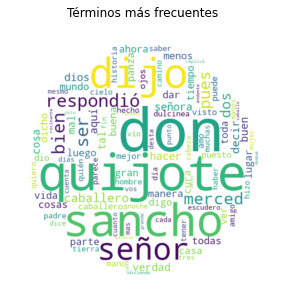

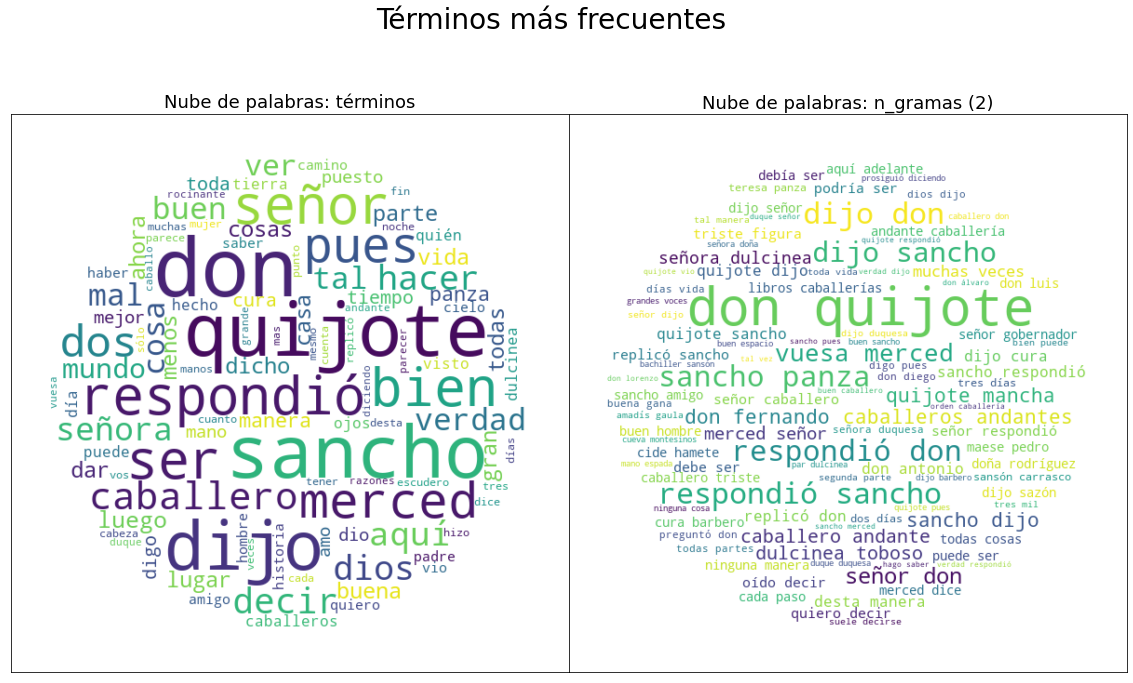

In [2]:
from contexto.exploracion import obtener_ngramas
from contexto.exploracion import nube_palabras
from contexto.exploracion import par_nubes

# Obtener listas de palabras y bigramas más frecuentes
unigramas = obtener_ngramas(texto, 1)
bigramas = obtener_ngramas(texto, 2)

## Graficar y guardar nubes de palabras y bigramas

# El parámetro "dim_figura" permite definir el tamaño de la gráfica
nube_palabras(texto, n_grama=1, ubicacion_archivo='salida/nube_uni.jpg', semilla=130, dim_figura=(5,5))

# Si se pone "graficar=False", la gráfica no se mostrará.
nube_palabras(texto, n_grama=2, ubicacion_archivo='salida/nube_bi.jpg', hor=0.9, graficar=False)

# Si se utiliza el parámetro "ubicacion_archivo", la imagen generada se guardará en la ubicación especificada
par_nubes(texto, n1=1, n2=2, ubicacion_archivo='salida/nube_uni_bi.jpg')

#### Personalizar las nubes de palabras
La función de nubes de palabras tiene algunos parámetros que permiten personalizar la estética de la gráfica. En particular, se puede configurar:

- La forma de la nube: Para esto, se puede ingresar una imagen de referencia con la forma que uno quiera utilizar. Por defecto, esta forma es circular.
- El color de fondo
- El color y grosor del contorno: Esto permite delinear la forma de la nube de palabras


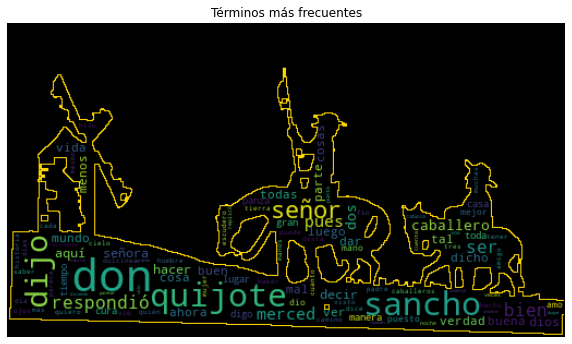

In [3]:
nube_palabras(texto, n_grama=1, semilla=130, hor=0.9, color_contorno='gold', 
             grosor_contorno=1, color_fondo='black', forma='entrada/quijote.jpg')

#### Gráficos de barras

Los n-gramas más frecuentes también se pueden visualizar mediante gráficas más estándar como, por ejemplo, gráficos de barras que muestren los términos más frecuentes. La función `grafica_barchart_frecuencias` permite obtener estas gráficas.

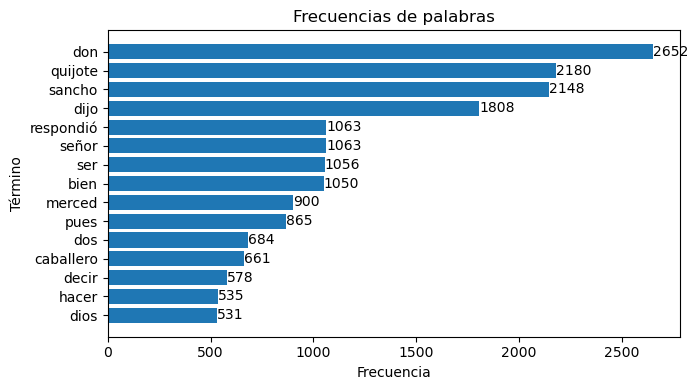

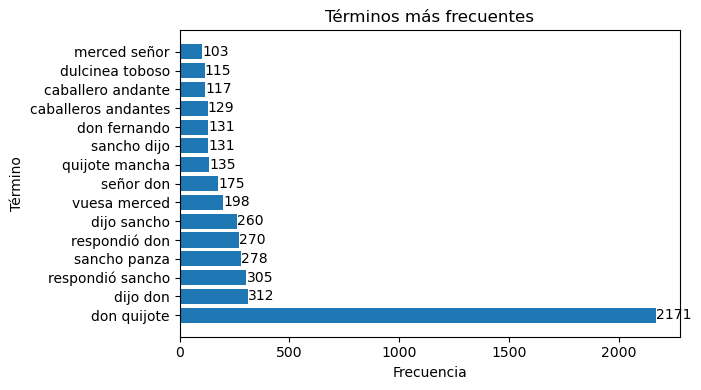

In [4]:
from contexto.exploracion import grafica_barchart_frecuencias

# Gráficas de barras con las frecuencias
grafica_barchart_frecuencias(texto, ubicacion_archivo='salida/barras_palabras.jpg', 
                             titulo='Frecuencias de palabras', dim_figura=(7,4))

# Si se cambia el parámetro "ascendente" a False, los términos más frecuentes saldrán en la parte de abajo
grafica_barchart_frecuencias(texto, ubicacion_archivo='salida/barras_bigramas.jpg', 
                             n_grama=2, ascendente=False, dim_figura=(7,4))


#### Gráficos de dispersión léxica

Además de la frecuencia, la importancia de una palabra se puede ponderar por su dispersión en el texto. La dispersión léxica es una medida de la homogeneidad de una palabra en diferentes partes del texto. Esta medida puede ser visualizada usando el gráfico de dispersión léxica, en donde en el eje horizontal se marca con una línea cada una de las ocurrencias de una palabra, y en el eje vertical se muestran las palabras de interés. La función `grafica_dispersion` permite obtener estas gráficas.

En el siguiente ejemplo se definen algunas palabras de interés y se hace el gráfico correspondiente. Palabras como *obispo* y *esparto* aparecen hacía al final del texto, mientras que palabras como *caballero* y *merced* aparecen en todo el texto.

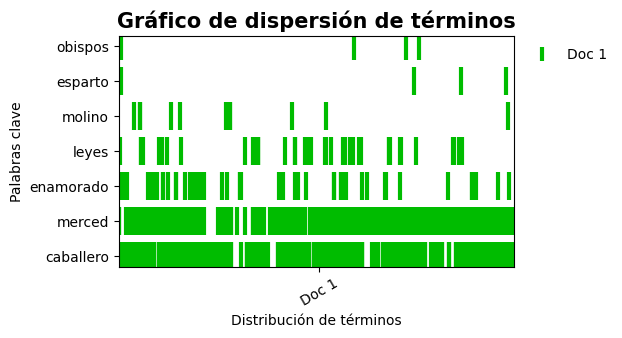

In [5]:
from contexto.exploracion import graficar_dispersion

# Se definen las palabras de interés
mis_palabras = ['caballero', 'merced', 'enamorado', 'leyes', 'molino', 'esparto', 'obispos']

# Gráfico de dispersión
graficar_dispersion(texto, mis_palabras, dim_figura=(6,3))

También se puede graficar un conjunto de documentos o textos independientes. Estos textos deben ser pasados como una lista.

In [6]:
# Diferentes textos en una lista
textos = [
    'Un campesino alimentaba al mismo tiempo a una cabra y a un asno. La cabra, envidiosa porque su compañero estaba mejor atendido, le dio el siguiente consejo: - La noria y la carga hacen de tu vida un tormento interminable; simula una enfermedad y déjate caer en un foso, pues así te dejarán reposar.',
    'Al salir la cabra de su establo encargó a su hijo el cuidado de la casa, advirtiéndole el peligro de los animales que rondaban por los alrededores con intención de entrar a los establos y devorar los ganados.',
    'Bien sé que eres nuestro mayor adversario y que, imitando la voz de mi madre, pretendes entrar para devorarme. Puedes marcharte, odiado animal, que no seré yo quien te abra la puerta.',
    'Cierta cabra robó un queso y, llevando su botín fue a saborearlo en la copa de un árbol. En estas circunstancias lo vio un asno muy astuto, y comenzó a adularlo con la intención de arrebatárselo.'
]

# Palabras de interés
mis_palabras = ['el', 'la', 'en', 'campesino', 'cuidado', 'cabra', 'asno']

En el caso en que se considera más de un texto, el gráfico es dividido de acuerdo a la cantidad de textos, y en cada división se muestran las ocurrencias de las palabras.

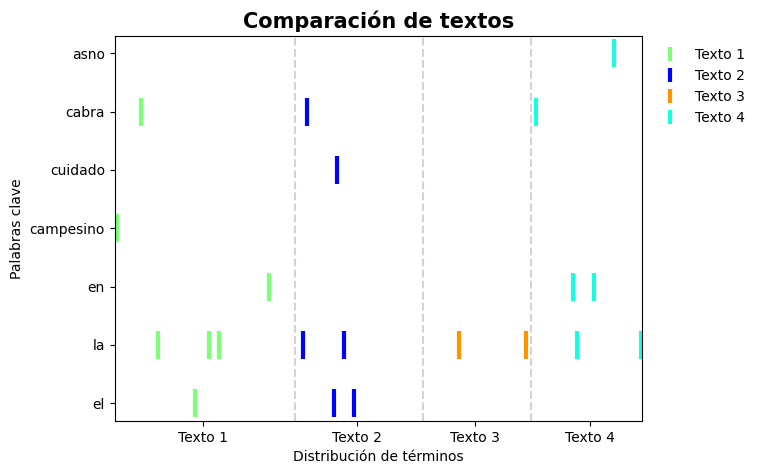

In [7]:
graficar_dispersion(textos, mis_palabras, titulo = 'Comparación de textos', rotacion = 0, 
                    etiquetas = ['Texto 1', 'Texto 2', 'Texto 3', 'Texto 4'],
                    mapa_color='jet', auto_etiquetas = True, leyenda = True, dim_figura=(8,5), 
                    ubicacion_archivo='salida/dispersion.jpg')

---

## 3. Calcular coocurrencias y graficarlas
En lingüistica, la coocurrencia es la aparición o utilización conjunta de dos unidades léxicas (por ejemplo, palabras o n-gramas) en una unidad superior, como una oración o un documento. La función matriz_coocurrencias permite calcular las coocurrencias de términos en un mismo documento o en una ventana de $\pm n$ palabras. 

A patir de estas matrices de coocurrencias es posible graficar redes o grafos de coocurrencia, en las cuales el tamaño de cada punto es proporcional a la frecuencia de aparición de ese término y el grosor de las lineas entre puntos es proporcional a la cantidad de veces que dos términos aparecen juntos en un documento o una ventana de palabras.


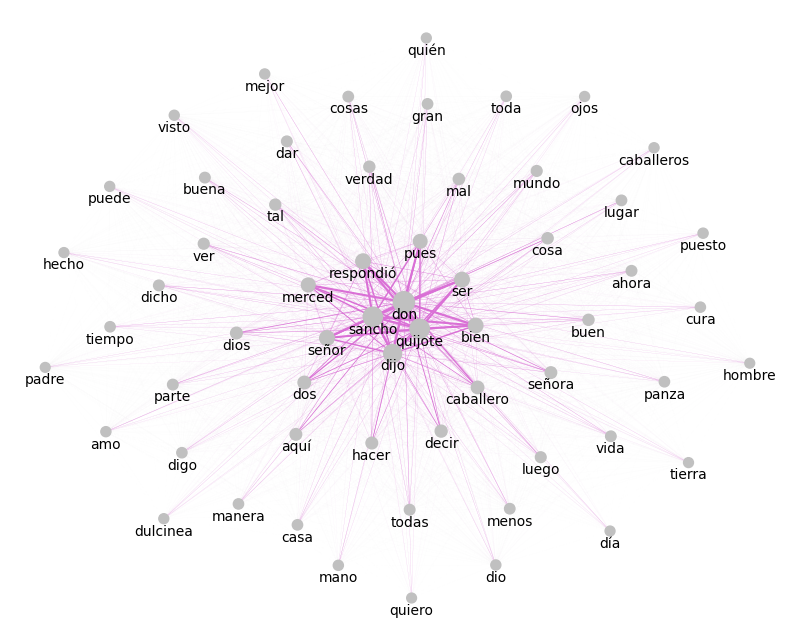

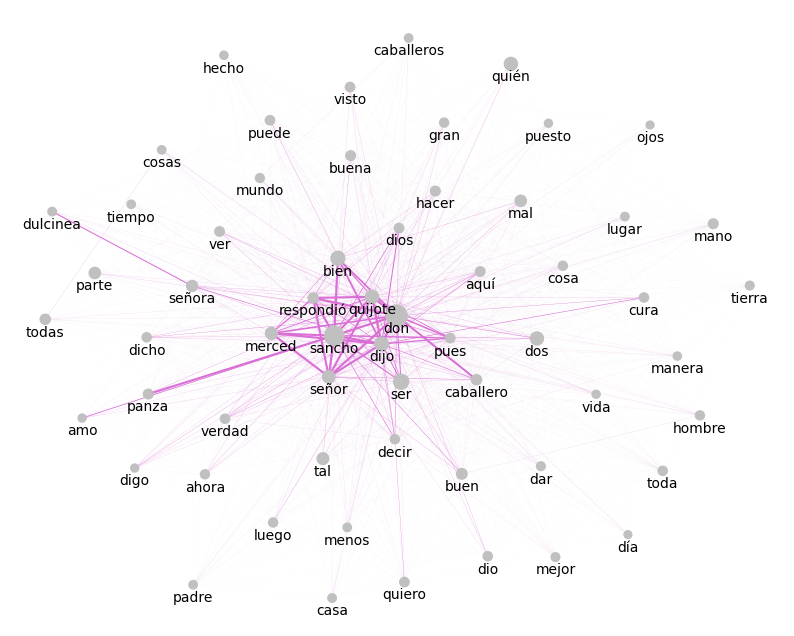

In [8]:
## Obtener matrices de coocurrencias
from contexto.exploracion import matriz_coocurrencias
from contexto.exploracion import graficar_coocurrencias

mat_doc = matriz_coocurrencias(texto, max_num=60)
# Solo se cuenta la coocurrencia si las palabras están a 5 o menos palabras entre sí
mat_ven = matriz_coocurrencias(texto, max_num=60, modo='ventana', ventana=5)

## Graficar co-ocurrencias de palabras en el texto

graficar_coocurrencias(mat_doc, ubicacion_archivo='salida/grafo_doc_full.jpg', dim_figura=(10,8))
# El parámetro "prop_fuera" se utiliza para quitar líneas de menos coocurrencias del grafo,
# con el propósito de simplificar un poco la gráfica
graficar_coocurrencias(mat_doc, prop_fuera=80, ubicacion_archivo='salida/grafo_doc_top20.jpg', graficar=False)

graficar_coocurrencias(mat_ven, ubicacion_archivo='salida/grafo_ven_full.jpg', dim_figura=(10,8))
graficar_coocurrencias(mat_ven, prop_fuera=80, ubicacion_archivo='salida/grafo_ven_top20.jpg', graficar=False)

También se pueden calcular y graficar coocurrencias sobre un conjunto de documentos o textos independientes. Estos textos deben ser pasados como una lista.

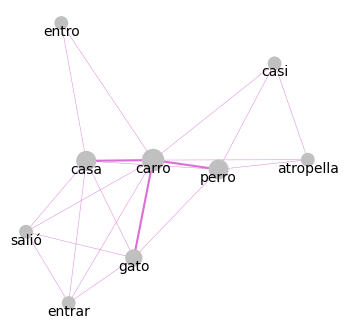

c:\users\dagil\onedrive - departamento nacional de planeacion\documents\danielgil\learning\contextopackage\contexto_env\lib\site-packages\contexto\exploracion.py:473: RuntimeWarning: divide by zero encountered in log
  lista_nodos = [[i, mat.loc[i, i] / np.log(max_diag)] for i in mat.columns]


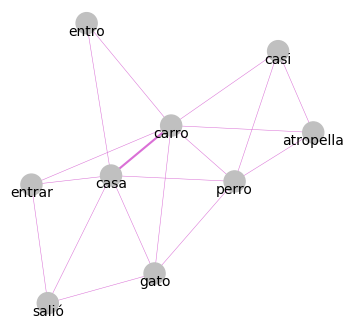

In [9]:
# Ejemplo con un grupo de textos
textos = [
    'el perro está en la casa',
    'un perro y un gato están en el carro',
    'el carro entro a la casa',
    'el gato salió de la casa para entrar al carro',
    'el carro casi atropella al perro']

textos = [limpieza_texto(t, lista_palabras=lista_stopwords()) for t in textos]

mat_doc = matriz_coocurrencias(textos)
mat_ven = matriz_coocurrencias(textos, modo='ventana', ventana=2)

graficar_coocurrencias(mat_doc, dim_figura=(4,4))
graficar_coocurrencias(mat_ven, dim_figura=(4,4))
